In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import colors

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.shape

(2240, 29)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## Dealing with Missing Values

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [9]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [10]:
df['Income'] = df['Income'].fillna(df.groupby('Education')['Income'].transform('mean'))

In [11]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Creating New Features

In [12]:
# Umur client
df['Age'] = datetime.now().year - df['Year_Birth']

In [13]:
# Tahun registrasi
def get_different_year():
    registration_year = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
    current_year = datetime.now().year
    return current_year - registration_year

df['Years_Since_Registration'] = get_different_year()

In [14]:
# Education - dibahasakan dengan menggunakan angka
df['Education'] = df['Education'].replace({"Basic": 0, "Graduation": 1, "2n Cycle": 2, "Master": 2, "PhD": 3})

In [15]:
# Encoding untuk status pernikahan (marital status)
df['Marital_Status'] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone",
    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

step_2 = df['Marital_Status'].replace({'Alone': 1, 'Partner': 2})

df["Family_Size"] = step_2 + df['Kidhome'] + df['Teenhome']  # jumlah orang dalam satu keluarga

df = pd.concat([df, pd.get_dummies(df['Marital_Status'])], axis=1)  # memisahkan antara 'alone' dan 'partner'

In [16]:
# Total jumlah produk yang dihasikan
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Sum_Mnt'] = df[mnt_cols].sum(axis=1) 

In [17]:
# Jumlah campaign dari perusahaan yang diterima customer
accepted_cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                     'Response']
df['Num_Accepted_Cmp'] = df[accepted_cmp_cols].sum(axis=1) 

In [18]:
# Total pembelian
total_purchases = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Num_Total_Purchases'] = df[total_purchases].sum(axis=1)

## Descriptive Statistics and Visualization

In [19]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Age,Years_Since_Registration,Family_Size,Alone,Partner,Sum_Mnt,Num_Accepted_Cmp,Num_Total_Purchases
0,5524,1957,1,Alone,58138.0,0,0,04-09-2012,58,635,...,11,1,66,11,1,1,0,1617,1,22
1,2174,1954,1,Alone,46344.0,1,1,08-03-2014,38,11,...,11,0,69,9,3,1,0,27,0,4
2,4141,1965,1,Partner,71613.0,0,0,21-08-2013,26,426,...,11,0,58,10,2,0,1,776,0,20
3,6182,1984,1,Partner,26646.0,1,0,10-02-2014,26,11,...,11,0,39,9,3,0,1,53,0,6
4,5324,1981,3,Partner,58293.0,1,0,19-01-2014,94,173,...,11,0,42,9,3,0,1,422,0,14


In [20]:
sat_mean = df['Income'].mean()
sat_median = df['Income'].median()
sat_mode = df['Income'].mode()[0]

In [21]:
print('Mean:',sat_mean)
print('Median:',sat_median)
print('Mode:',sat_mode)

Mean: 52253.592375488624
Median: 51609.5
Mode: 7500.0


In [22]:
# Quartile
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
# Percentile
p99 = df['Income'].quantile(0.99)

In [23]:
q1,q3,p99

(35538.75, 68289.75, 94437.68000000001)

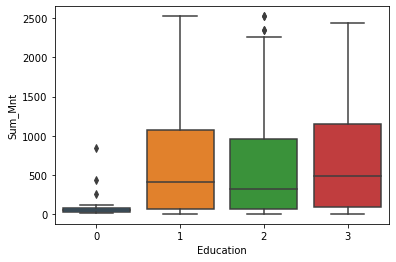

In [24]:
# boxplot dari satisfaction_level
# untuk data education vs total produk yang dibeli
sns.boxplot(x=df['Education'] ,y=df['Sum_Mnt'])
plt.show()

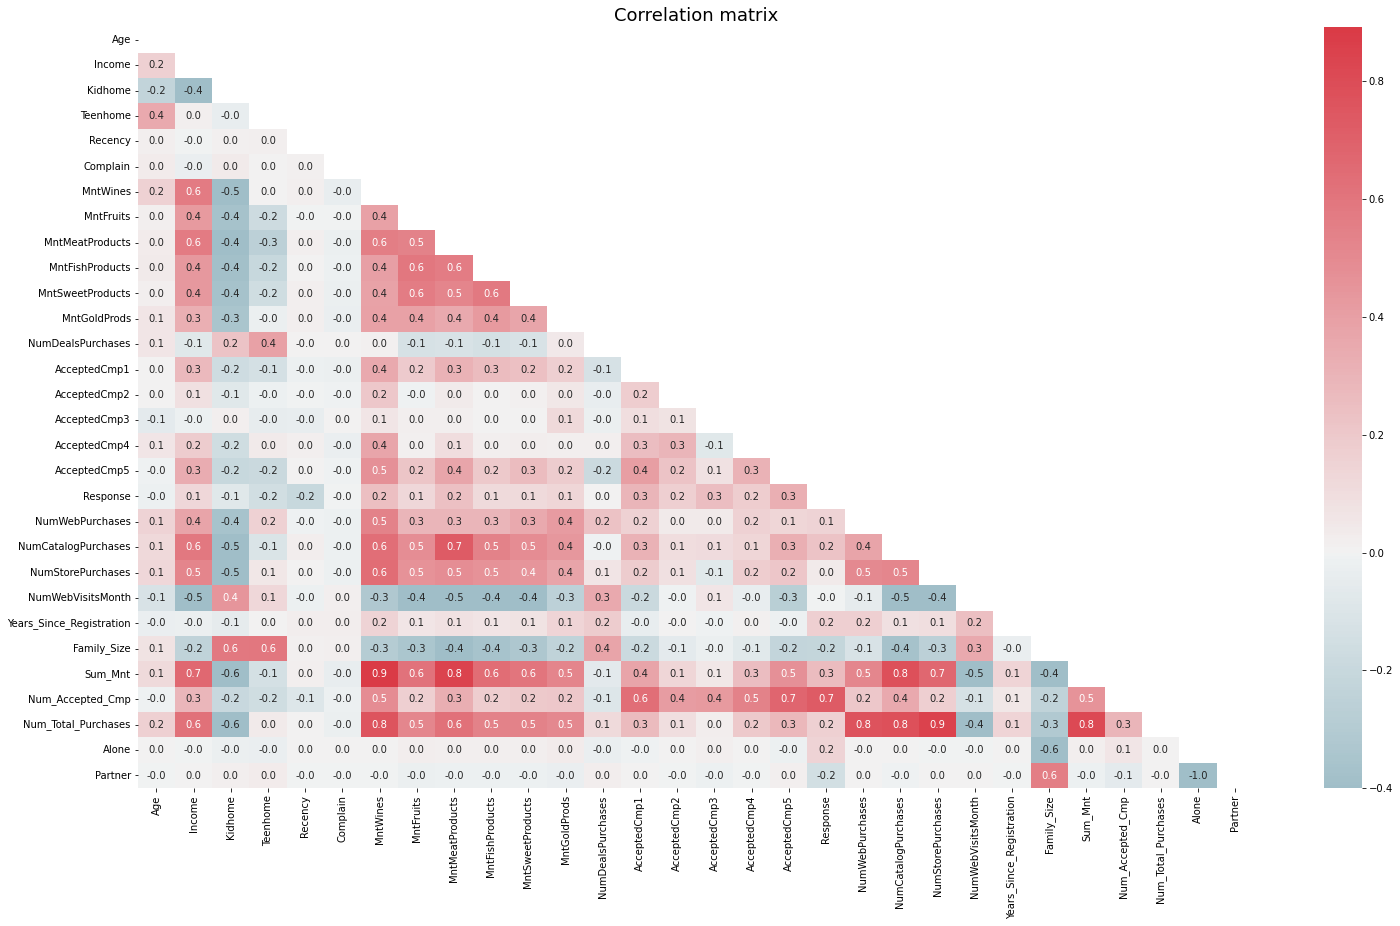

In [25]:
to_corr = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 
          'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
          'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
          'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebPurchases', 'NumCatalogPurchases', 
          'NumStorePurchases', 'NumWebVisitsMonth', 'Years_Since_Registration', 'Family_Size',
           'Sum_Mnt', 'Num_Accepted_Cmp', 'Num_Total_Purchases', 'Alone', 'Partner']

cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = np.triu(df[to_corr].corr())
plt.figure(figsize=(25, 14))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(df[to_corr].corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)

plt.show()

In [26]:
df.cov()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Age,Years_Since_Registration,Family_Size,Alone,Partner,Sum_Mnt,Num_Accepted_Cmp,Num_Total_Purchases
ID,1.054082e+07,1.074820,-15.094816,1.049734e+06,4.204992,-4.561071,-4374.721821,-2.500181e+04,594.010184,-3.251689e+03,...,0.0,-25.410174,-1.074820,14.255949,29.066082,-29.422161,29.422161,-3.530053e+04,-106.643136,-360.921065
Year_Birth,1.074820e+00,143.617921,-1.434771,-4.834225e+04,1.485139,-2.297803,-6.897017,-6.364238e+02,-8.540209,-8.350949e+01,...,0.0,0.091050,-143.617921,0.231249,-0.788359,-0.024305,0.024305,-8.033425e+02,0.088607,-14.075651
Education,-1.509482e+01,-1.434771,0.705026,2.150793e+03,-0.018444,0.046084,-0.569932,4.603834e+01,-2.875671,1.548258e+00,...,0.0,0.025315,1.434771,-0.021914,0.029800,-0.002161,0.002161,3.263683e+01,0.039620,0.479791
Income,1.049734e+06,-48342.252120,2150.793278,6.269558e+08,-5729.275516,260.091405,-2822.870224,4.861150e+06,426991.883753,3.261938e+06,...,0.0,1183.581814,48342.252120,-385.432722,-5414.344925,-54.839186,54.839186,1.001992e+07,6396.888247,112305.058551
Kidhome,4.204992e+00,1.485139,-0.018444,-5.729276e+03,0.289873,-0.010593,0.137638,-8.994061e+01,-7.978437,-5.312204e+01,...,0.0,-0.015347,-1.485139,-0.019659,0.285344,-0.006065,0.006065,-1.804999e+02,-0.092738,-2.206060
Teenhome,-4.561071e+00,-2.297803,0.046084,2.600914e+02,-0.010593,0.296522,0.255457,8.882983e-01,-3.828375,-3.209929e+01,...,0.0,-0.029963,2.297803,0.003079,0.293957,-0.008028,0.008028,-4.538284e+01,-0.077158,0.148719
Recency,-4.374722e+03,-6.897017,-0.569932,-2.822870e+03,0.137638,0.255457,838.823673,1.566019e+02,-4.959824,1.507236e+02,...,0.0,-2.047580,6.897017,0.517146,0.330595,0.062500,-0.062500,3.563981e+02,-2.294544,1.337839
MntWines,-2.500181e+04,-636.423834,46.038343,4.861150e+06,-89.940614,0.888298,156.601943,1.132978e+05,5216.313319,4.274870e+04,...,0.0,29.650947,636.423834,35.527892,-90.022915,0.970599,-0.970599,1.807895e+05,146.643301,1834.815693
MntFruits,5.940102e+02,-8.540209,-2.875671,4.269919e+05,-7.978437,-3.828375,-4.959824,5.216313e+03,1581.926033,4.875708e+03,...,0.0,1.775370,8.540209,1.501581,-12.272387,0.465575,-0.465575,1.471295e+04,6.119458,149.227072
MntMeatProducts,-3.251689e+03,-83.509491,1.548258,3.261938e+06,-53.122041,-32.099285,150.723649,4.274870e+04,4875.707838,5.094743e+04,...,0.0,19.005226,83.509491,12.743122,-87.341380,2.120054,-2.120054,1.145900e+05,66.367597,1013.788812


In [27]:
## Spearman
df[['Years_Since_Registration','Num_Total_Purchases']].corr(method='spearman')

,Years_Since_Registration,Num_Total_Purchases
Years_Since_Registration,1.000000,0.140422
Num_Total_Purchases,0.140422,1.000000


In [28]:
## Pearson
df[['Years_Since_Registration','Num_Total_Purchases']].corr()

,Years_Since_Registration,Num_Total_Purchases
Years_Since_Registration,1.000000,0.143044
Num_Total_Purchases,0.143044,1.000000


## Hypothesis Testing

menggunakan T - test karena membandingkan 2 grup antara 'Education' dengan 'Income'

In [35]:
df[['Income','Education']].describe()

,Income,Education
count,2240.000000,2240.000000
mean,52253.592375,1.665625
std,25039.085601,0.839658
min,1730.000000,0.000000
25%,35538.750000,1.000000
50%,51609.500000,1.000000
75%,68289.750000,2.000000
max,666666.000000,3.000000


In [30]:
from statsmodels.stats.weightstats import ttest_ind

t_stat, p_val, _ = ttest_ind(df['Education'], 
                              df['Income'])
print(f"t_stat is {t_stat:.4f}")
print(f"p_val is {p_val:.4f}")

t_stat is -98.7661
p_val is 0.0000


p-value < 0.05 -> reject H0: result is significant